In [1]:
import numpy as np
import cv2
import face_recognition
import matplotlib.pyplot as plt
import utilities
from importlib import reload
import glob

Number of faces detected : 1


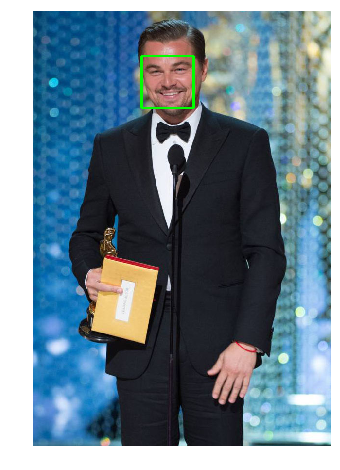

In [2]:
known_image = face_recognition.load_image_file("images/dicaprio-oscar.jpg")
k_locations = face_recognition.face_locations(known_image)
print('Number of faces detected : {}'.format(len(k_locations)))
img_cpy = np.copy(known_image)
for top, right, bottom, left in k_locations: cv2.rectangle(img_cpy,(left,top),(right,bottom),(0,255,0),3)
utilities.show(img_cpy, figsize=(8,8))

In [3]:
k_encoding = face_recognition.face_encodings(known_image)[0]

In [4]:
type(k_encoding)

numpy.ndarray

In [5]:
k_encoding.shape

(128,)

In [6]:
dicaprio_images = [face_recognition.load_image_file(i) for i in glob.glob('images/dicaprio/*')]

In [8]:
f_locs = [face_recognition.face_locations(i) for i in dicaprio_images]

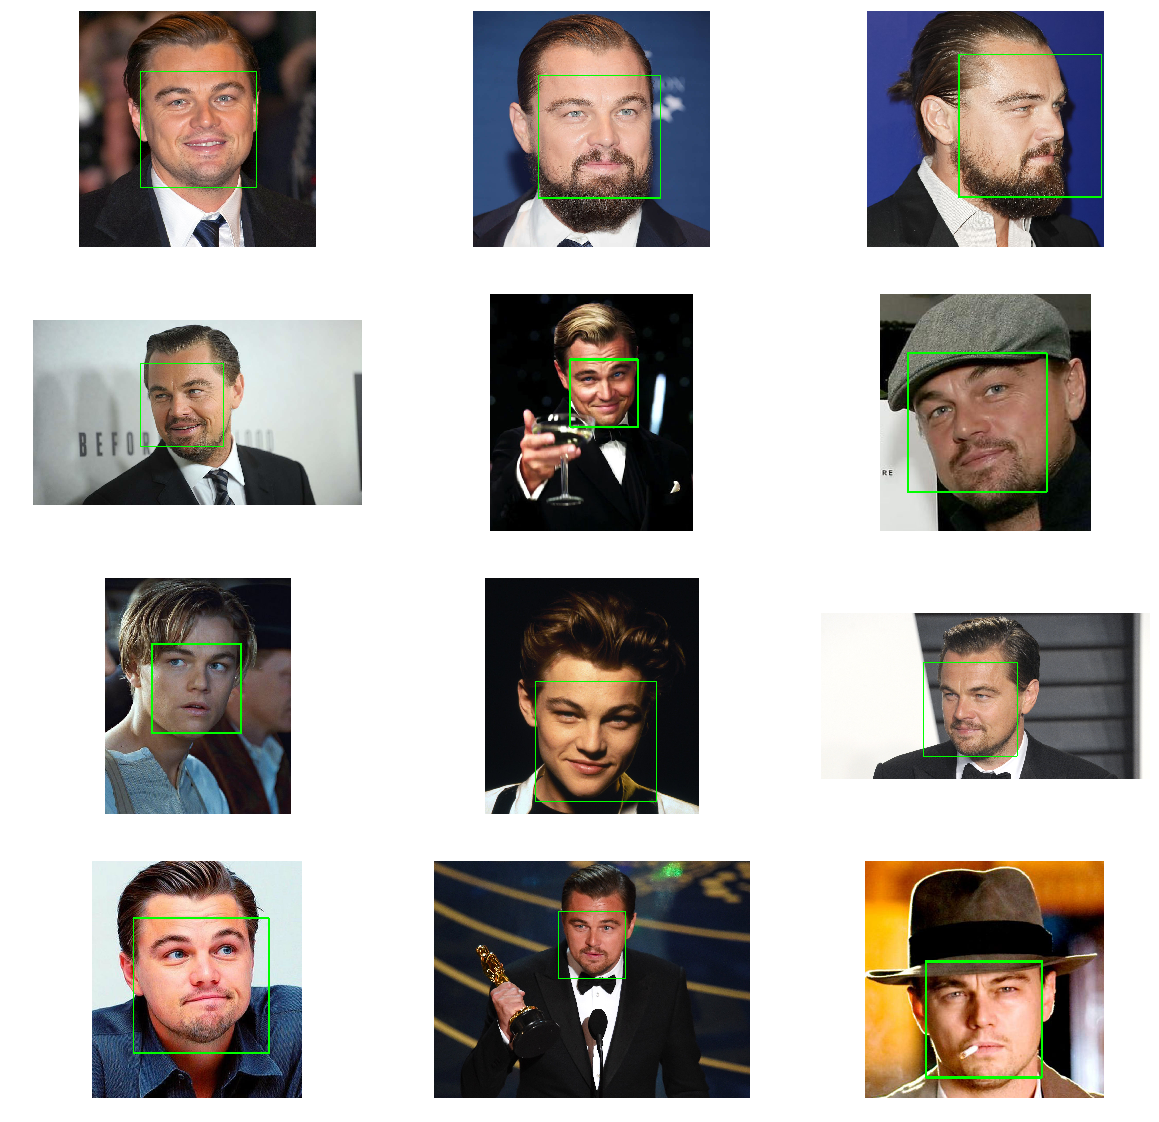

In [10]:
_, axarr = plt.subplots(4,3,figsize=(20, 20))
axa = axarr.reshape(-1)
for ax,img,loc in zip(axa, dicaprio_images, f_locs):
    current_plot = ax
    current_plot.axis('off')
    c_img = np.copy(img)
    top, right, bottom, left = loc[0]
    _ = cv2.rectangle(c_img,(left,top),(right,bottom),(0,255,0),3)
    current_plot.imshow(c_img)

In [11]:
dicaprio_images_encodings = [face_recognition.face_encodings(i)[0] for i in dicaprio_images]

In [13]:
diff = face_recognition.face_distance(dicaprio_images_encodings, k_encoding)

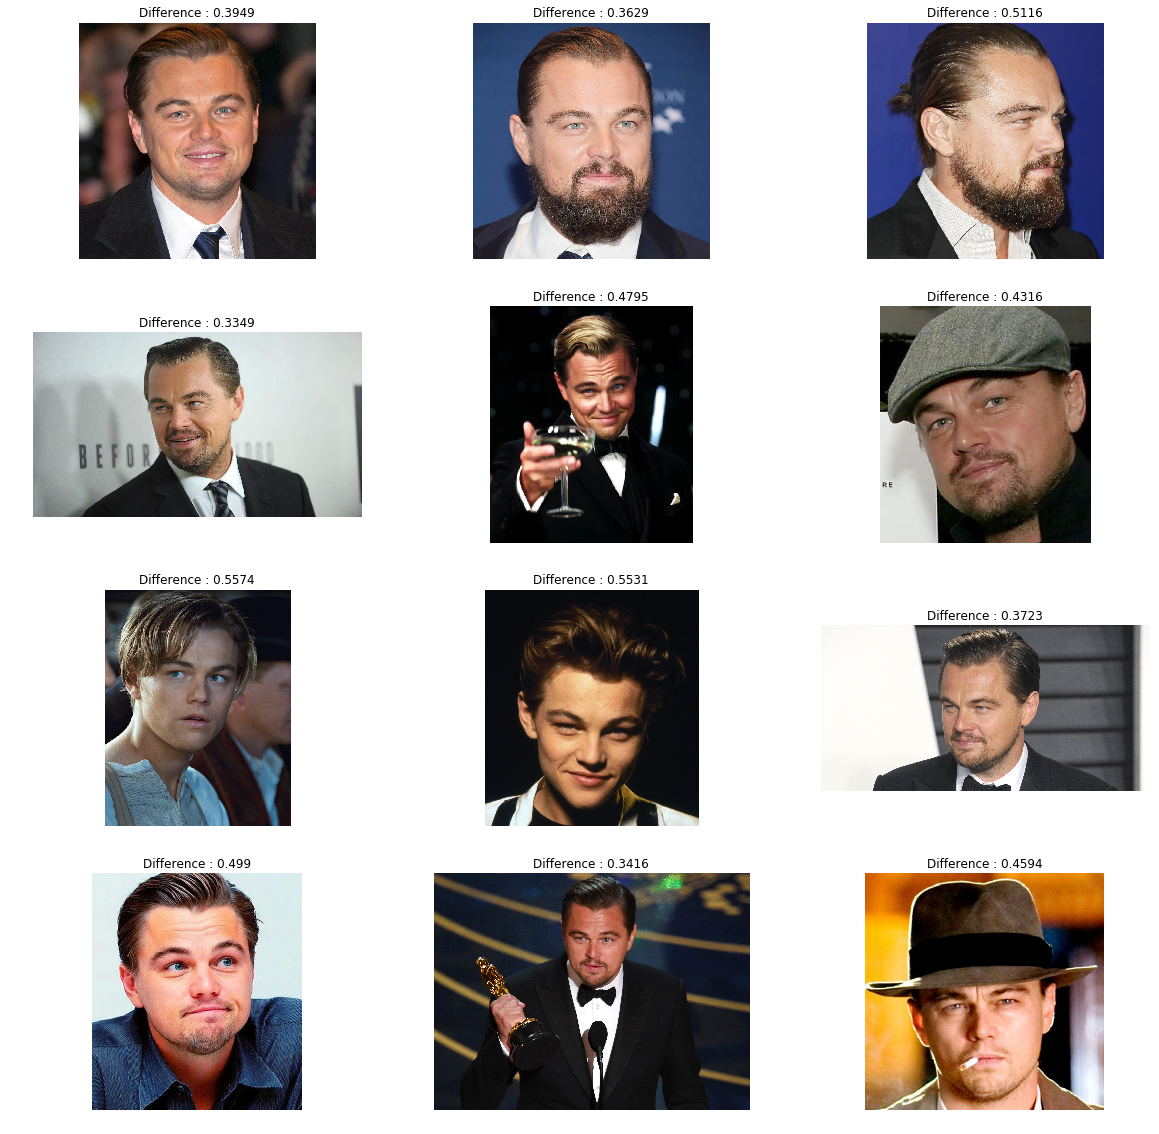

In [14]:
_, axarr = plt.subplots(4,3,figsize=(20, 20))
axa = axarr.reshape(-1)
for ax,img, d in zip(axa, dicaprio_images, diff):
    current_plot = ax
    current_plot.axis('off')
    current_plot.imshow(img)
    current_plot.set_title('Difference : {:.4}'.format(d))

In [15]:
other_images = [face_recognition.load_image_file(i) for i in glob.glob('images/people/*')]

In [16]:
other_f_locs = [face_recognition.face_locations(i) for i in other_images]

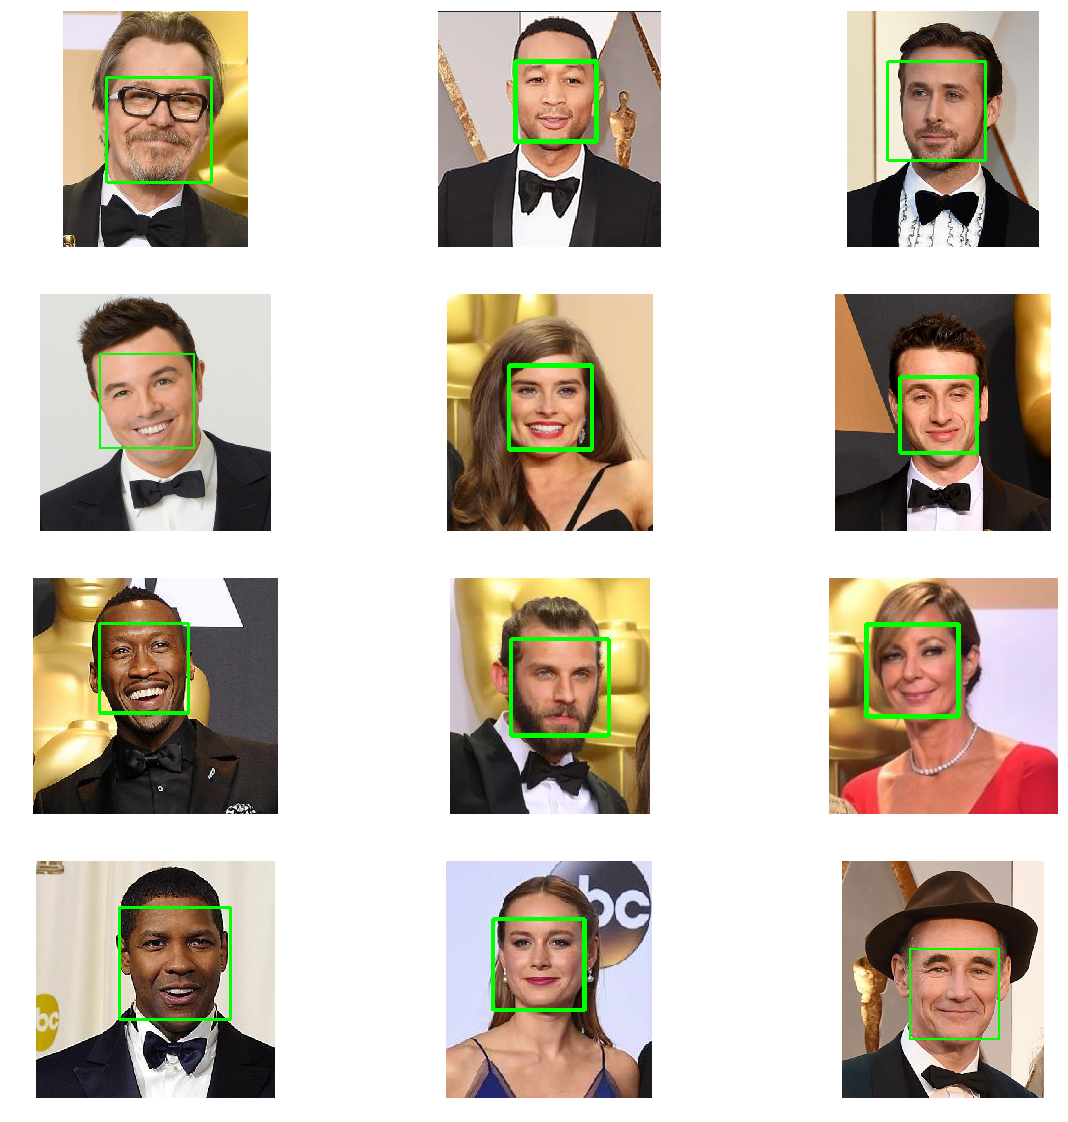

In [17]:
_, axarr = plt.subplots(4,3,figsize=(20, 20))
axa = axarr.reshape(-1)
for ax,img,loc in zip(axa, other_images, other_f_locs):
    current_plot = ax
    current_plot.axis('off')
    c_img = np.copy(img)
    top, right, bottom, left = loc[0]
    _ = cv2.rectangle(c_img,(left,top),(right,bottom),(0,255,0),3)
    current_plot.imshow(c_img)

In [18]:
other_images_encodings = [face_recognition.face_encodings(i)[0] for i in other_images]

In [19]:
diff_other = face_recognition.face_distance(other_images_encodings, k_encoding)

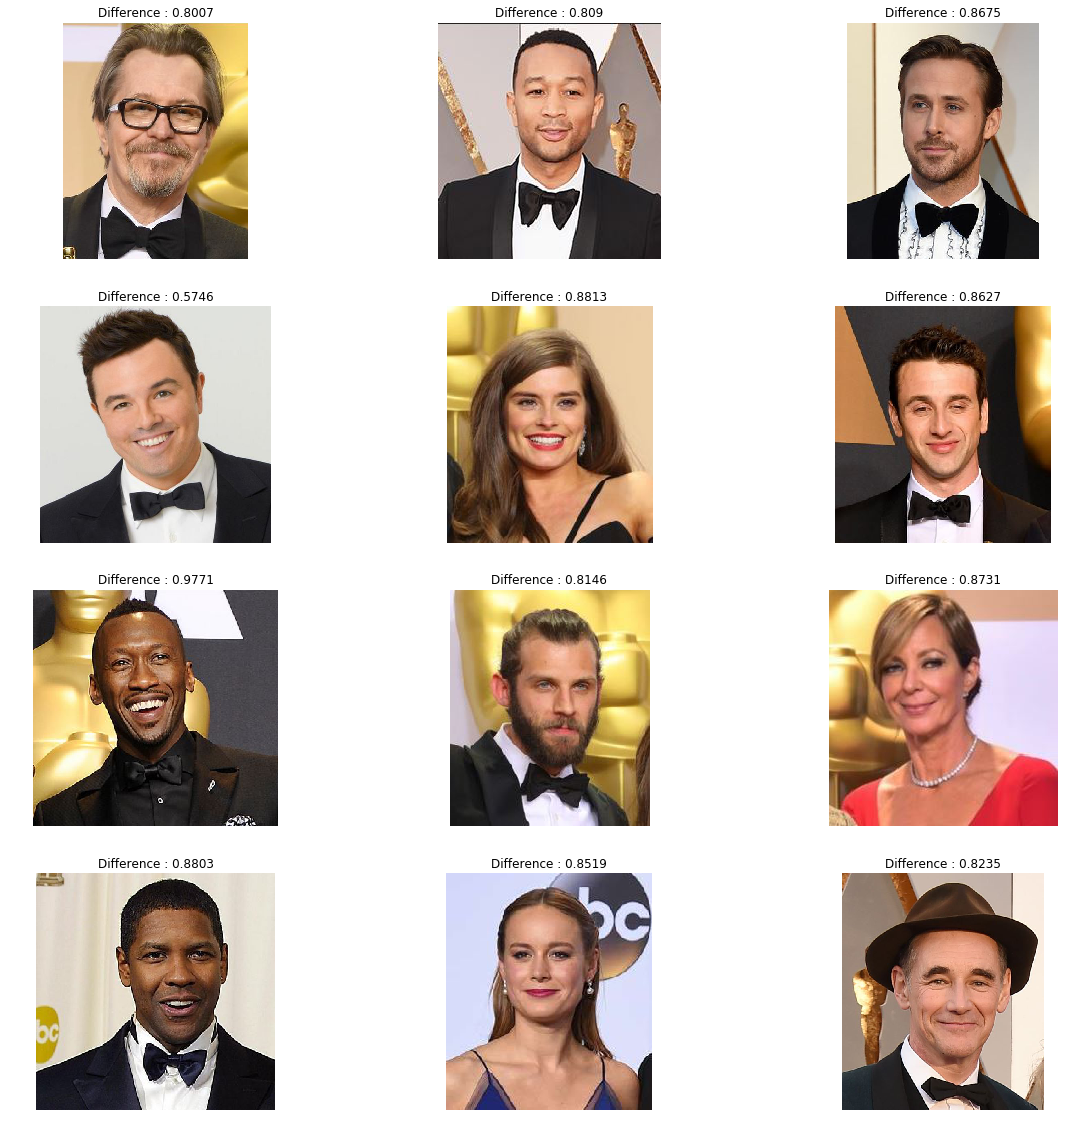

In [20]:
_, axarr = plt.subplots(4,3,figsize=(20, 20))
axa = axarr.reshape(-1)
for ax,img, d in zip(axa, other_images, diff_other):
    current_plot = ax
    current_plot.axis('off')
    current_plot.imshow(img)
    current_plot.set_title('Difference : {:.4}'.format(d))